# Random Chess

Can you calibrate a probability distribution on pieces and their points to make a random game of chess converge towards mate faster?
- vary board size and try custom rules I thought of
    - like cellular automata
    - also with multiple moves at once

- Simulated annealing?

cOnnection to criticality and ising model, spin glasses

then deploy to Javascript as fun website widget

random walk gist:
```python
for t in range(moves):
    team_turn = TEAMS[t%2]
    avail_pieces = pieces[team_turn]
    if avail_pieces['K'].check:
        #move to prevent check
        # if no moves, king.mate=True
    else: 
        piece = random.choice(avail_pieces)
        piece.move('random')
```

{'w': [a4, b2, c2, d2, e2, f2, g2, h2, Ra1, Rh1, Nb1, Ng1, Bc1, Bf1, Qd1, Ke1],
 'b': [a7, b7, c7, d7, e7, f7, g7, h7, Ra8, Rh8, Nb8, Ng8, Bc8, Bf8, Qd8, Ke8]}

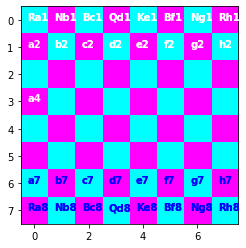

In [86]:
import random
import numpy as np
import matplotlib.pyplot as plt

TEAMS = 'wb'
COLUMNS = 'abcdefgh'
COLOR_DIRECTION = {'w':1, 'b':-1} # see Piece.N

def empty_board():
    board_mat = []
    for i in range(4):
        board_mat.append([0,1]*4)
        board_mat.append([1,0]*4)
    plt.imshow(board_mat, cmap='cool')
    
class Piece:
    def __init__(self, team, position, name, points):
        """
        team: 'b' or 'w' 
        position: (col, row)
        declared with default arguments in child __init__():
            name: piece notation
            points: 
        every Piece has a valid_moves() method in its child class
            takes an input move in_, which is defaulted to random
        """
        self.team = team 
        self.position = position
        self.name = name 
        self.points = points
        self.id_ = hash(random.random())
        self.alive = True
        self.had_first_move = False
        self.N = COLOR_DIRECTION[self.team] #in what direction the piece "sees" North
    
    def move(self, board, in_='random'):
        moves = self.valid_moves(board)
        if in_ == 'random':
            move = random.choice(moves)
        else:
            if in_ in moves:
                move = in_
            else:
                print('Not a valid move')
        self.position = move
        
    def str_position(self):
        p = self.position
        return f'{COLUMNS[p[0]]}{p[1]+1}'

    def __repr__(self):
        return f'{self.name}{self.str_position()}'
        
class Pawn(Piece):
    def __init__(self, team, position):
        super().__init__(team, position, name='', points=1)
        self.promoted = False
        if self.promoted:
            #change class instance?
            pass
        
    def valid_moves(self, board):
        N = self.N
        c, r = self.position #column, row
        valid_moves = []
        p = self.position
        if not self.had_first_move and board[r+N*2][c] == 0: #2 spaces
            valid_moves.append((c,r+N*2))
        if board[r+N*1][c] == 0: # 1 space
            valid_moves.append((c,r+N*1))
            
        return valid_moves
    
class Rook(Piece):
    def __init__(self, team, position):
        super().__init__(team, position, name='R', points=5)

    def valid_moves(self):
        pass
    
class Knight(Piece):
    def __init__(self, team, position):
        super().__init__(team, position, name='N', points=3)

    def valid_moves(self):
        pass
    
class Bishop(Piece):
    def __init__(self, team, position):
        super().__init__(team, position, name='B', points=3)

    def valid_moves(self):
        pass
    
class Queen(Piece):
    def __init__(self, team, position):
        super().__init__(team, position, name='Q', points=9)
        
    def valid_moves(self):
        pass
    
class King(Piece):
    def __init__(self, team, position):
        super().__init__(team, position, name='K', points=None)
        self.check = False
        self.mate = False
        
    def valid_moves(self):
        pass
        
class Chess:
    def __init__(self):
        self.pieces = []

        for piece, iters in zip([Pawn, Rook, Knight, Bishop, Queen, King], 
                                [range(8), (0,7), (1,6), (2,5), (3,), (4,)]):
            if piece == Pawn:
                row_w, row_b = 1, 6
            else:
                row_w, row_b = 0, 7

            for i in iters:
                self.pieces.append(piece(team='w', position=(i, row_w)))
                self.pieces.append(piece(team='b', position=(i, row_b)))

    def teams(self):
        """Alternative way to look at self.pieces, useful for random walk"""
        pcs = self.pieces
        return {c: [p for p in pcs if p.team==c and p.alive] for c in TEAMS}
    
    def board(self):
        """Return image representation of board"""
        board = [[0 for i in range(8)] for i in range(8)]
        for pc in self.pieces:
            if pc.alive:
                x, y = pc.position
                board[y][x] = pc
        return board
    
    def move(self, piece, in_):
        piece.move(self.board(), in_)
        
    def show(self):
        empty_board()
        for p in self.pieces:
            if p.alive:
                y,x = p.position
                plt.annotate(str(p), (y-0.25,x), c=p.team, weight='bold')        
    
    def __repr__(self):
        return str(np.array(self.board())) # for matrix format
        
game = Chess()
game.show()
# game.pieces[0].valid_moves(game.board())
game.move(game.pieces[0], (0,3))
game.show()
game.teams()

# todo
- figure better way to update pieces (instead of referring to piece as game.pieces[index]
- complete all moves for other pieces


In [46]:
class A:
    def do(self):
        return self.x
    def do2(self):
        return self.thing()
    
class Arr:
    def __init__(self):
        self.items = [0,B(),0]
        self.pos = [0, B.id_, 0]
        
    def __repr__(self):
        return 'hi'
        
    def update(self, piece):
        self.items[piece.pos] = 
class B(A, Arr):
    def __init__(self):
        self.x = 3
        self.id_ = hash(random.random())
        
    
    def thing(self):
        return [1,2]

#     def where(self, arr_obj):
#         return arr_obj.arr.index(self)
    

    
    
b = B()

b.do()

a = Arr()
a.arr[1].where(a)

SyntaxError: invalid syntax (<ipython-input-46-2ab68dd1e887>, line 16)